## **Installing Dependencies** 

In [278]:
!pip install numpy;
!pip install matplotlib;
!pip install pandas
!pip install seaborn
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Importing libraries**

In [279]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
import seaborn as sns;
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error;
from sklearn import linear_model;

## **Uploading dataset**

In [280]:
df = pd.read_csv('garments_worker_productivity.csv')
df[df.duplicated()]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


## **Preprocessing dataset**

In [281]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


### **Actual productivity is supposed to be from 0-1. This code removes all values greater than 1**

In [282]:
df.drop(df[df["actual_productivity"] > 1].index, inplace = True)
len(df)

1160

### **Checking for null values and replacing them accordingly**

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1160 non-null   object 
 1   quarter                1160 non-null   object 
 2   department             1160 non-null   object 
 3   day                    1160 non-null   object 
 4   team                   1160 non-null   int64  
 5   targeted_productivity  1160 non-null   float64
 6   smv                    1160 non-null   float64
 7   wip                    666 non-null    float64
 8   over_time              1160 non-null   int64  
 9   incentive              1160 non-null   int64  
 10  idle_time              1160 non-null   float64
 11  idle_men               1160 non-null   int64  
 12  no_of_style_change     1160 non-null   int64  
 13  no_of_workers          1160 non-null   float64
 14  actual_productivity    1160 non-null   float64
dtypes: f

In [284]:
df["wip"].fillna(df["wip"].median(), inplace=True)

### **Correcting some spelling mistakes**

In [285]:
df['department'] = df['department'].str.replace('finishing ','finishing')

### **Drawing box plot for each column to check for outlier points**

In [286]:
def plot_boxplot(df, ft):
  df.boxplot(column= [ft])
  plt.grid(False)
  plt.show()

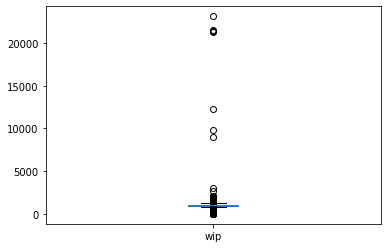

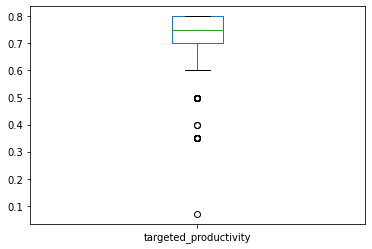

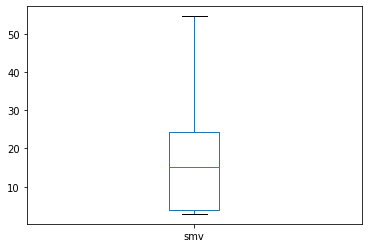

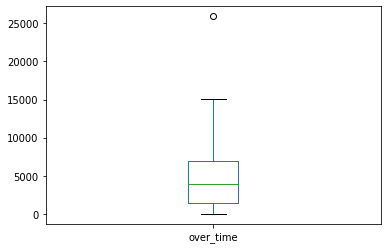

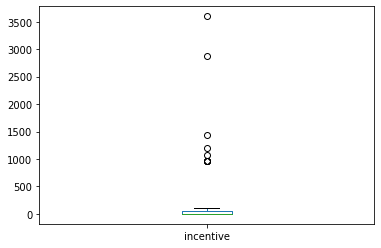

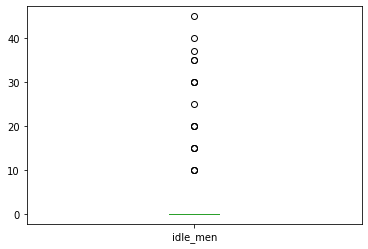

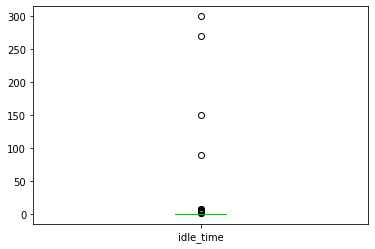

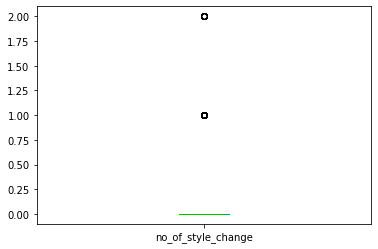

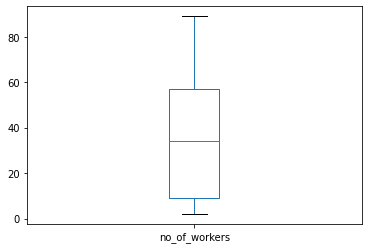

In [287]:
cols = ["wip", "targeted_productivity", "smv", "over_time", "incentive", "idle_men", "idle_time", "no_of_style_change", "no_of_workers"]
for i in cols:
  plot_boxplot(df, i)

In [288]:
df[df["idle_time"]>50]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
615,2/4/2015,Quarter1,sweing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5,0.650835
617,2/4/2015,Quarter1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.350706
650,2/7/2015,Quarter1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
654,2/7/2015,Quarter1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.365319


In [289]:
df.drop(df[df["incentive"]>100].index, inplace = True)
df.drop(df[df["wip"]>2000].index, inplace = True)
df.drop(df[df["wip"]<100].index, inplace = True)
# df.drop(df[df["over_time"]>10000].index, inplace = True)
# df.drop(df[df["idle_time"]>50].index, inplace = True)

### **Dropping columns**

In [290]:
df.drop(axis ="columns", labels="date", inplace = True)
df.drop(axis ="columns", labels="quarter", inplace = True)
df.drop(axis ="columns", labels="day", inplace = True)
df.drop(axis ="columns", labels="team", inplace = True)
df.drop(axis ="columns", labels="department", inplace=True)
df.describe()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,0.727169,14.954534,1011.299024,4589.751553,23.997338,0.773736,0.383319,0.154392,34.178793,0.727195
std,0.099521,11.034077,256.690505,3372.796206,27.651135,13.097489,3.355546,0.433024,22.190635,0.167821
min,0.070000,2.900000,103.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.700000,3.940000,964.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650211
50%,0.750000,15.090000,1028.500000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.755167
75%,0.800000,24.260000,1068.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.845264
max,0.800000,54.560000,1871.000000,25920.000000,100.000000,300.000000,45.000000,2.000000,89.000000,0.999995


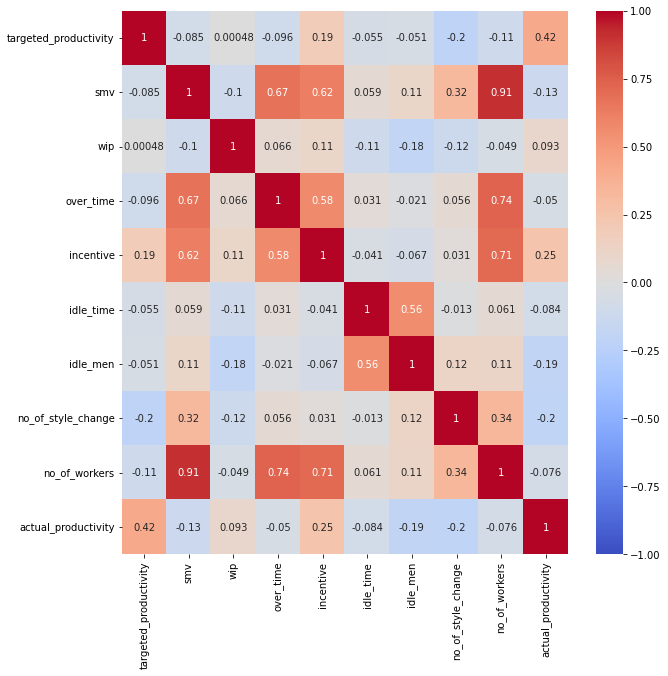

In [291]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap="coolwarm", annot=True)

In [292]:
df.drop_duplicates(inplace = True)

In [293]:
df.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0.75,3.94,1028.5,960,0,0.0,0,0,8.0,0.886500
2,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125


In [294]:
df.drop(axis = "columns", labels = { "smv", "idle_time", "no_of_workers", "over_time"}, inplace = True)
df.head()
# df.drop(axis = "columns", labels = {"wip"}, inplace = True)

,targeted_productivity,wip,incentive,idle_men,no_of_style_change,actual_productivity
0,0.80,1108.0,98,0,0,0.940725
1,0.75,1028.5,0,0,0,0.886500
2,0.80,968.0,50,0,0,0.800570
4,0.80,1170.0,50,0,0,0.800382
5,0.80,984.0,38,0,0,0.800125


### **Normalising the data**

In [295]:
df_norm = df.copy()
  
col = [ "targeted_productivity","wip","incentive",  "idle_men", "no_of_style_change"]
# col = ["targeted_productivity", "smv", "over_time","incentive", "idle_time", "idle_men", "no_of_style_change", "no_of_workers"]
# apply normalization techniques
for column in col :
    df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max()- df_norm[column].min()) 
  
# apply normalization techniques
# for column in col:
#     df_norm[column] = (df_norm[column] -df_norm[column].mean()) / df_norm[column].std()    
  
# view normalized data   
display(df_norm) 
  
# view normalized data
df = df_norm
df_norm

,targeted_productivity,wip,incentive,idle_men,no_of_style_change,actual_productivity
0,1.000000,0.568439,0.98,0.0,0.0,0.940725
1,0.931507,0.523473,0.00,0.0,0.0,0.886500
2,1.000000,0.489253,0.50,0.0,0.0,0.800570
4,1.000000,0.603507,0.50,0.0,0.0,0.800382
5,1.000000,0.498303,0.38,0.0,0.0,0.800125
...,...,...,...,...,...,...
1191,0.794521,0.470588,0.26,0.0,0.5,0.650596
1193,0.863014,0.523473,0.00,0.0,0.0,0.625625
1194,0.794521,0.523473,0.00,0.0,0.0,0.625625
1195,0.931507,0.523473,0.00,0.0,0.0,0.505889


,targeted_productivity,wip,incentive,idle_men,no_of_style_change,actual_productivity
0,1.000000,0.568439,0.98,0.0,0.0,0.940725
1,0.931507,0.523473,0.00,0.0,0.0,0.886500
2,1.000000,0.489253,0.50,0.0,0.0,0.800570
4,1.000000,0.603507,0.50,0.0,0.0,0.800382
5,1.000000,0.498303,0.38,0.0,0.0,0.800125
...,...,...,...,...,...,...
1191,0.794521,0.470588,0.26,0.0,0.5,0.650596
1193,0.863014,0.523473,0.00,0.0,0.0,0.625625
1194,0.794521,0.523473,0.00,0.0,0.0,0.625625
1195,0.931507,0.523473,0.00,0.0,0.0,0.505889


In [296]:
df = df.sample(frac = 1)

In [297]:
df.drop_duplicates()
Actual = df["actual_productivity"]
dataset = df.drop(axis = "columns", labels = "actual_productivity", inplace = False)
print(len(Actual), len(dataset))
Actual

1084 1084


224     0.850137
804     0.927542
664     0.800355
710     0.393549
1081    0.700424
          ...   
435     0.500062
1195    0.505889
642     0.870083
1063    0.592083
861     0.609583
Name: actual_productivity, Length: 1084, dtype: float64

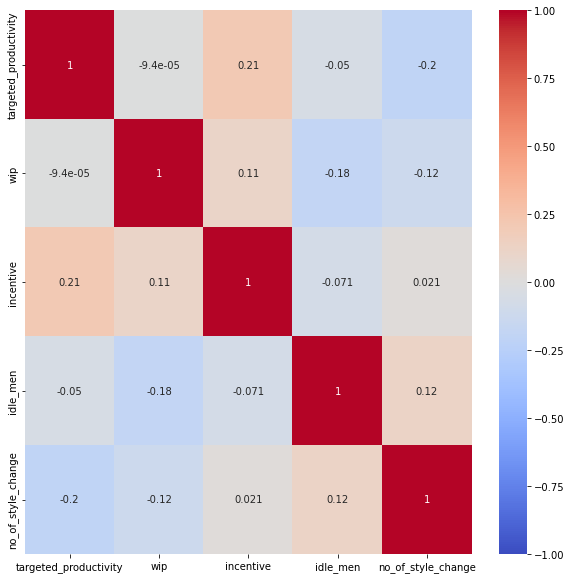

In [298]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), vmin=-1, cmap="coolwarm", annot=True)

### **Adding bias term**

In [299]:
dataset.insert(0, "bias", 1)
dataset.head()

,bias,targeted_productivity,wip,incentive,idle_men,no_of_style_change
224,1,1.000000,0.578620,0.60,0.0,0.0
804,1,1.000000,0.523473,0.00,0.0,0.0
664,1,1.000000,0.522059,0.63,0.0,0.0
710,1,0.589041,0.541855,0.30,0.0,0.5
1081,1,0.863014,0.071833,0.40,0.0,0.0


## **Split the dataset into testing and training dataset**

In [300]:
train = dataset[:880]
trainA = Actual[:880]
test = dataset[881:]
testA = Actual[881:]
train = train.to_numpy()
trainA = trainA.to_numpy()
test = test.to_numpy()
testA = testA.to_numpy()

## **Learn and test the model**

In [301]:
def calculate(train, trainA):
  transpose = np.matrix.transpose(train)
  weights = np.matmul(np.matmul(np.linalg.inv(np.matmul(transpose, train)), transpose), trainA)
  return weights

In [302]:
# testing the model
def predict(weights, test):
  ypred = np.matmul(test, weights)
  return ypred

## **Evaluate the model**

In [303]:
#Check mean squared error
def error(ypred, testA):
  sum = 0
  ypred
  for i in range(len(ypred)):
    difference = np.subtract(testA[i], ypred[i])
    sq = np.square(difference)
    sum += sq
  sum /= len(ypred)

  return sum

In [304]:
def r2_scr(testA, pred, mse):
  num1 = mse*len(ypred)
  num2=0
  for i in range(len(testA)):
    num2 += np.square(testA[i]-testA.mean())
  return (1 - num1/num2)

In [305]:
weights = calculate(train, trainA)
ypred = predict(weights, test)
err = error(ypred, testA)
print("The mean square error", err)
print("The r2 score is", r2_scr(testA, ypred, err))

# print(mean_absolute_percentage_error(testA, ypred))
# for i in range(len(ypred)):
#   diff = np.subtract(ypred[i], testA[i])
#   if(diff > 0.1 or diff<-0.1):
#     print(test[i], ypred[i], testA[i])

The mean square error 0.022755625077441624
The r2 score is 0.180415889181349
